In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# In the next cell, we'll add the code that generates the latitudes and longitudes, 
#  but first, they need to be stored so that we can access them later. 
#   Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

#  To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) 
#   and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-90, high=90, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#  If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes,
#   where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.


In [5]:
# Next, let's unpack our lat_lngs zip object into a list. 
# This way, we only need to create a set of random latitudes and longitudes once. 

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
### Generate Random World Cities ###

In [7]:
# Now that we are familiar with using the citipy module, we can iterate through our zipped lat_lngs tuple and find the 
#  nearest city. When we find a city, we'll need to add it to a list so that we can use the cities to get the weather data.

In [8]:
# Import the citipy module
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [10]:
# Some of this code should look familiar, but let's break it down:

# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
# We add a decision statement with the logical operator not in to determine whether the found city is already in the cities
#  list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and 
#   longitudes, there might be duplicates, which will retrieve duplicate cities, 
#    and we want to be sure we capture only the unique cities.

In [11]:
### Get the City Weather Data ###

In [12]:
## Import Dependencies, and Initialize an Empty List and Counters

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d8b8af256dc40ac849d814ce0dcf408


In [15]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d8b8af256dc40ac849d814ce0dcf408&q=Boston


In [16]:
# Import the datetime module from the datetime library
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# In the code block, we have initialized the counters at 1 because we want the first iteration of the 
#  logging for each recorded response and the set to start at 1.

# Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records
#  in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
# We can also retrieve the city from the cities list and add it to the city_url by using indexing

# Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]

# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the 
#  list of cities and retrieve both the index, and the city from the list
# The syntax for the enumerate() method is the following: for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group our cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, set numbers, and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1

# Add a try block, Parse the JSON file, Assign variables for each piece of data we need, Add the data tot the cities list 
#   in a dictionary format
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
                

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rocha
Processing Record 2 of Set 13 | sao filipe
Processing Record 3 of Set 13 | victoria
Processing Record 4 of Set 13 | nanortalik
Processing Record 5 of Set 13 | kautokeino
Processing Record 6 of Set 13 | ribeira grande
Processing Record 7 of Set 13 | marawi
Processing Record 8 of Set 13 | upernavik
Processing Record 9 of Set 13 | port elizabeth
Processing Record 10 of Set 13 | aksum
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | jamestown
Processing Record 13 of Set 13 | kimamba
Processing Record 14 of Set 13 | sao lourenco do oeste
Processing Record 15 of Set 13 | rio grande
Processing Record 16 of Set 13 | bafilo
Processing Record 17 of Set 13 | bambous virieux
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | matameye
City not found. Skipping...
Processing Record 20 of Set 13 | nador
Processing Record 21 of Set 13 | lar
Processing Re

Processing Record 30 of Set 16 | tazovskiy
Processing Record 31 of Set 16 | praia da vitoria
Processing Record 32 of Set 16 | sao joao da barra
Processing Record 33 of Set 16 | harper
Processing Record 34 of Set 16 | mogadishu
Processing Record 35 of Set 16 | ilhabela
Processing Record 36 of Set 16 | znamenka
Processing Record 37 of Set 16 | diveyevo
Processing Record 38 of Set 16 | burica
City not found. Skipping...
Processing Record 39 of Set 16 | marathon
Processing Record 40 of Set 16 | likasi
Processing Record 41 of Set 16 | mechetinskaya
Processing Record 42 of Set 16 | bongandanga
Processing Record 43 of Set 16 | santa marta
Processing Record 44 of Set 16 | ouesso
Processing Record 45 of Set 16 | amderma
City not found. Skipping...
Processing Record 46 of Set 16 | pangnirtung
Processing Record 47 of Set 16 | namibe
Processing Record 48 of Set 16 | pula
Processing Record 49 of Set 16 | korla
Processing Record 50 of Set 16 | aswan
Processing Record 1 of Set 17 | waddan
Processing 

Processing Record 17 of Set 20 | bauchi
Processing Record 18 of Set 20 | botwood
Processing Record 19 of Set 20 | inzer
Processing Record 20 of Set 20 | tonota
Processing Record 21 of Set 20 | piacabucu
Processing Record 22 of Set 20 | inhambane
Processing Record 23 of Set 20 | morant bay
Processing Record 24 of Set 20 | shubarshi
Processing Record 25 of Set 20 | maracaibo
Processing Record 26 of Set 20 | paamiut
Processing Record 27 of Set 20 | nueva guinea
Processing Record 28 of Set 20 | orapa
Processing Record 29 of Set 20 | prado
Processing Record 30 of Set 20 | shadrinsk
Processing Record 31 of Set 20 | saint-augustin
Processing Record 32 of Set 20 | vila franca do campo
Processing Record 33 of Set 20 | krasnaya gora
Processing Record 34 of Set 20 | bandarbeyla
Processing Record 35 of Set 20 | stara moravica
Processing Record 36 of Set 20 | sorland
Processing Record 37 of Set 20 | galle
Processing Record 38 of Set 20 | obo
Processing Record 39 of Set 20 | jiblah
Processing Record

City not found. Skipping...
Processing Record 3 of Set 24 | sorgun
Processing Record 4 of Set 24 | sarahan
Processing Record 5 of Set 24 | port hope
Processing Record 6 of Set 24 | egersund
Processing Record 7 of Set 24 | pemba
Processing Record 8 of Set 24 | malanje
Processing Record 9 of Set 24 | kalyazin
Processing Record 10 of Set 24 | koson
Processing Record 11 of Set 24 | arkhangelsk
Processing Record 12 of Set 24 | qasigiannguit
Processing Record 13 of Set 24 | balykshi
Processing Record 14 of Set 24 | portree
Processing Record 15 of Set 24 | kita
Processing Record 16 of Set 24 | warqla
City not found. Skipping...
Processing Record 17 of Set 24 | ormara
Processing Record 18 of Set 24 | rabo de peixe
Processing Record 19 of Set 24 | dzhusaly
City not found. Skipping...
Processing Record 20 of Set 24 | nuuk
Processing Record 21 of Set 24 | doume
Processing Record 22 of Set 24 | andenes
Processing Record 23 of Set 24 | jaisalmer
Processing Record 24 of Set 24 | mumbwa
Processing Re

In [18]:
len(city_data)

576

In [19]:
len(cities)

625

In [20]:
### Create a DataFrame of City Weather Data ###

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rocha,-34.4833,-54.3333,56.21,72,99,5.57,UY,2021-07-22 19:43:27
1,Sao Filipe,14.8961,-24.4956,75.22,88,21,7.47,CV,2021-07-22 19:43:40
2,Victoria,22.2855,114.1577,83.32,88,100,1.01,HK,2021-07-22 19:40:45
3,Nanortalik,60.1432,-45.2371,45.27,89,62,10.58,GL,2021-07-22 19:43:40
4,Kautokeino,69.0125,23.0412,43.57,88,100,11.97,NO,2021-07-22 19:43:41
5,Ribeira Grande,38.5167,-28.7000,73.80,56,20,9.22,PT,2021-07-22 19:40:03
6,Marawi,7.9986,124.2928,70.65,90,100,6.87,PH,2021-07-22 19:43:41
7,Upernavik,72.7868,-56.1549,40.48,94,100,3.31,GL,2021-07-22 19:43:42
8,Port Elizabeth,-33.9180,25.5701,50.29,81,75,11.50,ZA,2021-07-22 19:43:42
9,Aksum,14.1245,38.7244,57.69,86,92,3.65,ET,2021-07-22 19:43:43


In [22]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
#  so they are easy to read.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rocha,UY,2021-07-22 19:43:27,-34.4833,-54.3333,56.21,72,99,5.57
1,Sao Filipe,CV,2021-07-22 19:43:40,14.8961,-24.4956,75.22,88,21,7.47
2,Victoria,HK,2021-07-22 19:40:45,22.2855,114.1577,83.32,88,100,1.01
3,Nanortalik,GL,2021-07-22 19:43:40,60.1432,-45.2371,45.27,89,62,10.58
4,Kautokeino,NO,2021-07-22 19:43:41,69.0125,23.0412,43.57,88,100,11.97
5,Ribeira Grande,PT,2021-07-22 19:40:03,38.5167,-28.7000,73.80,56,20,9.22
6,Marawi,PH,2021-07-22 19:43:41,7.9986,124.2928,70.65,90,100,6.87
7,Upernavik,GL,2021-07-22 19:43:42,72.7868,-56.1549,40.48,94,100,3.31
8,Port Elizabeth,ZA,2021-07-22 19:43:42,-33.9180,25.5701,50.29,81,75,11.50
9,Aksum,ET,2021-07-22 19:43:43,14.1245,38.7244,57.69,86,92,3.65


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
### Plot Latitude vs. Temperature ####

# We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. 
#  The first, latitude vs. maximum temperature, should look like the following scatter plot.

In [ ]:
## Get Data for Plotting

In [24]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

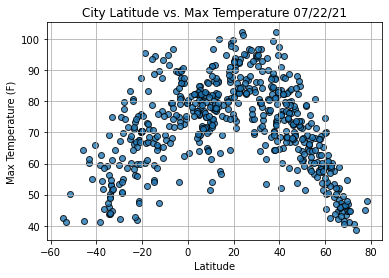

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="k",
            linewidths=1,
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
### Plot Latitude vs. Humidity ###

# In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and 
#   the y-axis label to "Humidity (%)."

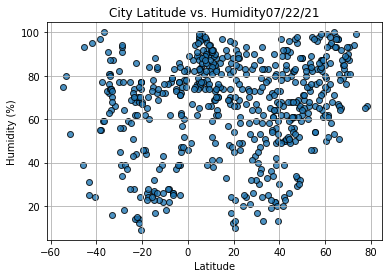

In [27]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel(f"Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
### Plot Latitude vs. Cloudiness ###

## Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," 
##   the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

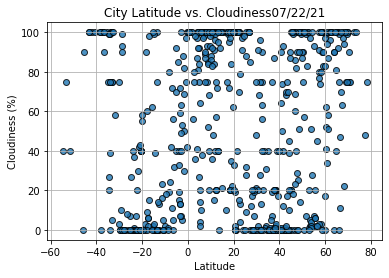

In [28]:
# Build the scatter plot
plt.scatter(lats,
            cloudiness,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.ylabel(f"Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()


In [ ]:
### Plot Latitude vs. Wind Speed ###

## Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable
##    to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

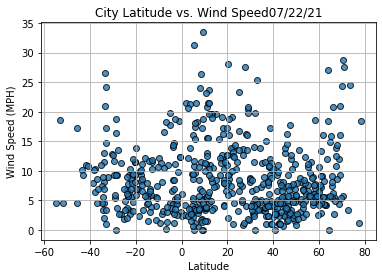

In [29]:
# Build the scatter plot
plt.scatter(lats,
            wind_speed,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel(f"Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

In [ ]:
### Using Linear Regression to find Correlations Between Latitude and the Four Different Weather Parameters ###

In [40]:
# In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, 
#  and we will add a fifth parameter for the title, called, title. 
# Now, add the algorithm we use to perform the linear regression underneath the function. 

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.ylabel(y_label)
    plt.xlabel(f"Latitude")
    plt.show()


In [ ]:
## Create the Hemisphere DataFrames

# We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.
# To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. 
#  The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
#   The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

# Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and 
#  running the cell. The output will present all the information at index 13 of the city_data_df DataFrame.

In [41]:
index13 = city_data_df.loc[13]
index13

City          Sao Lourenco Do Oeste
Country                          BR
Date            2021-07-22 19:43:44
Lat                        -26.3592
Lng                        -52.8511
Max Temp                      71.71
Humidity                         59
Cloudiness                        0
Wind Speed                     2.68
Name: 13, dtype: object

In [ ]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
#  latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code 
#   city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows 
#    that meet these criteria.

# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
#  we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the 
#   conditional filter city_data_df["Lat"] >= 0

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sao Filipe,CV,2021-07-22 19:43:40,14.8961,-24.4956,75.22,88,21,7.47
2,Victoria,HK,2021-07-22 19:40:45,22.2855,114.1577,83.32,88,100,1.01
3,Nanortalik,GL,2021-07-22 19:43:40,60.1432,-45.2371,45.27,89,62,10.58
4,Kautokeino,NO,2021-07-22 19:43:41,69.0125,23.0412,43.57,88,100,11.97
5,Ribeira Grande,PT,2021-07-22 19:40:03,38.5167,-28.7000,73.80,56,20,9.22


In [ ]:
# Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame
#  for latitudes less than 0.

In [43]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

In [ ]:
## Perfrom Linear Regression on the Maximum Temperature for the Northern Hemisphere

# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values.
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the 
#   northern_hemi_df DataFrame.

# Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for 
#   the maximum temperature scatter plot.

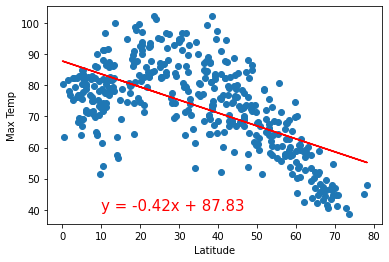

In [44]:
# Linear regression of the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature' ,
                       'Max Temp',(10,40))

In [ ]:
## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

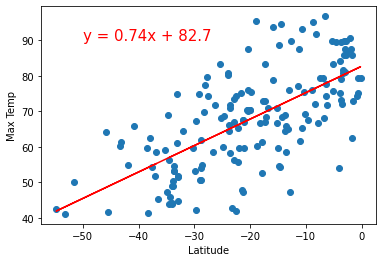

In [36]:
# Linear regression of the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature',
                       'Max Temp',(-50,90))

In [51]:
### Find the Correlation Between Latitude and Percent Humidity ###

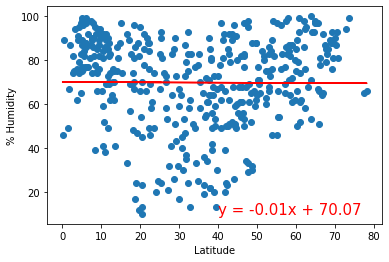

In [52]:
## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity',
                       '% Humidity',(40,10))

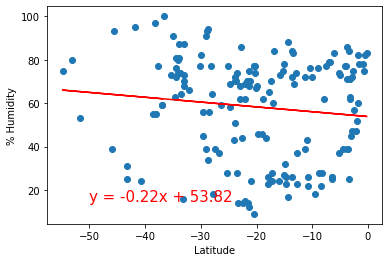

In [55]:
## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \ for % Humidity',
                       '% Humidity',(-50,15))


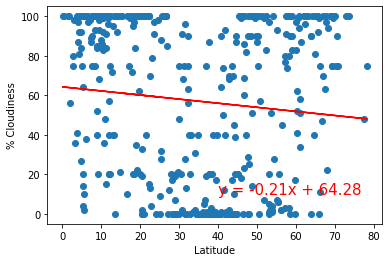

In [56]:
## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness',
                       '% Cloudiness',(40,10))

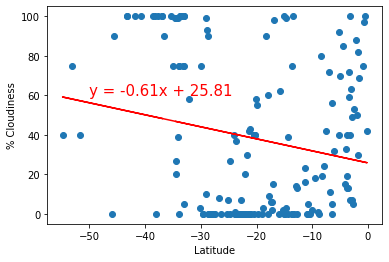

In [58]:
# Perfrom Linear Regression on the Percent Cloudiness for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness',
                       '% Cloudiness',(-50,60))

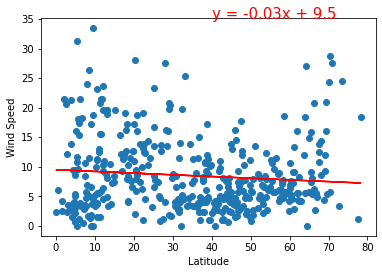

In [59]:
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed',
                       'Wind Speed',(40,35))

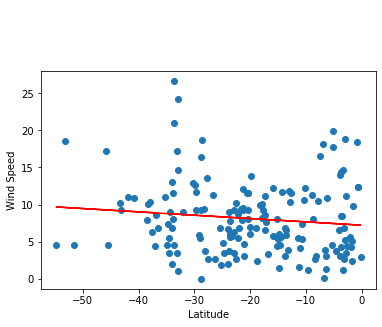

In [60]:
## Perfrom Linear Regression on the Wind Speed for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed',
                       'Wind Speed',(-50,35))

In [ ]:
# Finding

#The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the 
#  Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. 
# This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.
# Check the r-values for your plots.  